In [1]:
# from imagen_pytorch import Imagen, Unet
# from rsl_depth_completion.conditional_diffusion.utils import log_params_to_exp
# timesteps=200
# unet_base_params = dict(
#     dim=64,
#     dim_mults=[1, 1, 2, 4],
#     channels=1,
#     channels_out=None,
#     text_embed_dim=512,
#     num_resnet_blocks=2,
#     layer_attns=[True, True, True, True,],
#     layer_cross_attns=[True, True, True, True, ],
#     attn_heads=8,
#     lowres_cond=True,
#     memory_efficient=False,
#     attend_at_middle=False,
#     cond_dim=None,
#     cond_images_channels=1,
# )
# imagen_params = dict(
#     text_embed_dim=512,
#     channels=1,
#     timesteps=timesteps,
#     loss_type="l2",
#     lowres_sample_noise_level=0.2,
#     dynamic_thresholding_percentile=0.9,
#     only_train_unet_number=None,
#     image_sizes=[64],
#     text_encoder_name="google/t5-v1_1-base",
#     auto_normalize_img=False,
#     cond_drop_prob=0.1,
#     condition_on_text=False,
#     # pred_objectives="x_start",
# )


# unet_base = Unet(**unet_base_params)
# unets = [unet_base]

# imagen = Imagen(unets=unets, **imagen_params)
# print(sum(p.numel() for p in imagen.parameters() if p.requires_grad))

In [2]:
# from pprint import pprint
# largest contribution - dim_mults
init = 29305346
minus_1_midlayer_dimmul_2 = init-26396158
"{:_}".format(minus_1_midlayer_dimmul_2)

'2_909_188'

In [3]:
import os
from pathlib import Path

import comet_ml
import tensorflow as tf
import torch
import torch.optim as optim
from load_data import load_data
from rsl_depth_completion.conditional_diffusion.config import cfg
from rsl_depth_completion.conditional_diffusion.utils import log_params_to_exp
from rsl_depth_completion.diffusion.utils import set_seed

set_seed(cfg.seed)
torch.backends.cudnn.benchmark = True

if cfg.is_cluster:
    if not os.path.exists(f"{cfg.tmpdir}/cluster"):
        os.system(f"tar -xvf /cluster/project/rsl/kzaitsev/dataset.tar -C {cfg.tmpdir}")

import itertools
import shutil


def product_dict(**kwargs):
    keys = kwargs.keys()
    for instance in itertools.product(*kwargs.values()):
        yield dict(zip(keys, instance))


logdir = Path("./logs") if not cfg.is_cluster else Path(cfg.tmpdir) / "logs"
if cfg.do_debug:
    logdir = logdir / "debug2"
else:
    logdir = logdir / "train"

# shutil.rmtree(logdir,ignore_errors=True)

Found cached dataset fashion_mnist (/media/master/wext/cv_data/hf_home/datasets/fashion_mnist/fashion_mnist/1.0.0/0a671f063342996f19779d38c0ab4abef9c64f757b35af8134b331c294d7ba48)


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:

ds_params_full = product_dict(
    use_text_embed=[True, False],
    use_cond_image=[True, False],
    use_rgb_as_cond_image=[True, False],
)
ds_params = [
    list(ds_params_full)[-1]
]
ds_params

[{'use_text_embed': False,
  'use_cond_image': False,
  'use_rgb_as_cond_image': False}]

{'use_text_embed': False, 'use_cond_image': False, 'use_rgb_as_cond_image': False, 'use_rgb_as_text_embed': True, 'include_sdm_and_rgb_in_sample': True, 'do_crop': True}


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


Number of train samples 1
The base dimension of your u-net should ideally be no smaller than 128, as recommended by a professional DDPM trainer https://nonint.com/2022/05/04/friends-dont-let-friends-train-small-diffusion-models/
Number of parameters in model 29185282


Epoch 1:   0%|          | 2/800 [00:02<27:04,  2.04s/it, diff_to_orig_img=0.286, loss=0.381]

Epoch: 1	{'loss': 0.38103875517845154, 'diff_to_orig_img': 0.28579121828079224}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 21:   3%|▎         | 22/800 [00:10<01:39,  7.86it/s, diff_to_orig_img=0.00544, loss=0.00735]

Epoch: 21	{'loss': 0.007350199855864048, 'diff_to_orig_img': 0.005435341037809849}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 41:   5%|▌         | 42/800 [00:18<01:29,  8.51it/s, diff_to_orig_img=0.853, loss=0.172]    

Epoch: 41	{'loss': 0.1717161238193512, 'diff_to_orig_img': 0.8526341915130615}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 61:   8%|▊         | 62/800 [00:26<01:27,  8.47it/s, diff_to_orig_img=0.509, loss=0.0796]

Epoch: 61	{'loss': 0.07956642657518387, 'diff_to_orig_img': 0.5085137486457825}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 81:  10%|█         | 82/800 [00:35<01:25,  8.38it/s, diff_to_orig_img=1, loss=0.0451]    

Epoch: 81	{'loss': 0.04511051997542381, 'diff_to_orig_img': 1.0009032487869263}
Epoch 00005: reducing learning rate of group 0 to 5.0000e-05.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 101:  13%|█▎        | 102/800 [00:43<01:21,  8.52it/s, diff_to_orig_img=1.04, loss=0.0405]

Epoch: 101	{'loss': 0.04051118344068527, 'diff_to_orig_img': 1.035682201385498}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 121:  15%|█▌        | 122/800 [00:51<01:19,  8.58it/s, diff_to_orig_img=0.01, loss=0.00654]

Epoch: 121	{'loss': 0.006535104475915432, 'diff_to_orig_img': 0.010044321417808533}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 141:  18%|█▊        | 142/800 [01:00<01:22,  7.99it/s, diff_to_orig_img=1.02, loss=0.0434] 

Epoch: 141	{'loss': 0.04344000667333603, 'diff_to_orig_img': 1.0240025520324707}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 161:  20%|██        | 162/800 [01:08<01:15,  8.46it/s, diff_to_orig_img=0.111, loss=0.0246]

Epoch: 161	{'loss': 0.02457127906382084, 'diff_to_orig_img': 0.11069325357675552}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 181:  23%|██▎       | 182/800 [01:16<01:12,  8.58it/s, diff_to_orig_img=1.02, loss=0.0494] 

Epoch: 181	{'loss': 0.049445316195487976, 'diff_to_orig_img': 1.0244207382202148}
Epoch 00010: reducing learning rate of group 0 to 2.5000e-05.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 201:  25%|██▌       | 202/800 [01:24<01:08,  8.68it/s, diff_to_orig_img=1.06, loss=0.0299]

Epoch: 201	{'loss': 0.029922004789114, 'diff_to_orig_img': 1.0618712902069092}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 221:  28%|██▊       | 222/800 [01:32<01:06,  8.68it/s, diff_to_orig_img=0.269, loss=0.0328]

Epoch: 221	{'loss': 0.03282734006643295, 'diff_to_orig_img': 0.2687595784664154}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 241:  30%|███       | 242/800 [01:40<01:04,  8.61it/s, diff_to_orig_img=1.02, loss=0.0379] 

Epoch: 241	{'loss': 0.03785659000277519, 'diff_to_orig_img': 1.0208330154418945}
Epoch 00013: reducing learning rate of group 0 to 1.2500e-05.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 261:  33%|███▎      | 262/800 [01:48<01:11,  7.50it/s, diff_to_orig_img=1.03, loss=0.025] 

Epoch: 261	{'loss': 0.024966387078166008, 'diff_to_orig_img': 1.0324538946151733}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 281:  35%|███▌      | 282/800 [01:56<01:02,  8.26it/s, diff_to_orig_img=1.04, loss=0.0294]

Epoch: 281	{'loss': 0.029418636113405228, 'diff_to_orig_img': 1.0442333221435547}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 301:  38%|███▊      | 302/800 [02:04<00:57,  8.59it/s, diff_to_orig_img=1.02, loss=0.0305]

Epoch: 301	{'loss': 0.030531976372003555, 'diff_to_orig_img': 1.0209600925445557}
Epoch 00016: reducing learning rate of group 0 to 6.2500e-06.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 321:  40%|████      | 322/800 [02:13<00:55,  8.64it/s, diff_to_orig_img=0.186, loss=0.0233]

Epoch: 321	{'loss': 0.0232857633382082, 'diff_to_orig_img': 0.18558894097805023}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 341:  43%|████▎     | 342/800 [02:21<00:53,  8.51it/s, diff_to_orig_img=1.02, loss=0.0318] 

Epoch: 341	{'loss': 0.03176114708185196, 'diff_to_orig_img': 1.0167975425720215}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 361:  45%|████▌     | 362/800 [02:29<00:51,  8.57it/s, diff_to_orig_img=0.26, loss=0.0244]

Epoch: 361	{'loss': 0.024403998628258705, 'diff_to_orig_img': 0.25981318950653076}
Epoch 00019: reducing learning rate of group 0 to 3.1250e-06.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 381:  48%|████▊     | 382/800 [02:37<00:48,  8.54it/s, diff_to_orig_img=1.01, loss=0.042] 

Epoch: 381	{'loss': 0.04199397191405296, 'diff_to_orig_img': 1.0107347965240479}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 401:  50%|█████     | 402/800 [02:45<00:54,  7.26it/s, diff_to_orig_img=1.05, loss=0.0225]

Epoch: 401	{'loss': 0.022519046440720558, 'diff_to_orig_img': 1.0522764921188354}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 421:  53%|█████▎    | 422/800 [02:53<00:44,  8.42it/s, diff_to_orig_img=1.05, loss=0.0219]

Epoch: 421	{'loss': 0.021885190159082413, 'diff_to_orig_img': 1.0482022762298584}
Epoch 00022: reducing learning rate of group 0 to 1.5625e-06.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 441:  55%|█████▌    | 442/800 [03:02<00:42,  8.50it/s, diff_to_orig_img=1.04, loss=0.0228]

Epoch: 441	{'loss': 0.022782225161790848, 'diff_to_orig_img': 1.0404093265533447}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 461:  58%|█████▊    | 462/800 [03:10<00:39,  8.51it/s, diff_to_orig_img=1.04, loss=0.0243]

Epoch: 461	{'loss': 0.024329449981451035, 'diff_to_orig_img': 1.0392659902572632}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 481:  60%|██████    | 482/800 [03:18<00:37,  8.59it/s, diff_to_orig_img=1.04, loss=0.0262]

Epoch: 481	{'loss': 0.026236118748784065, 'diff_to_orig_img': 1.0373969078063965}
Epoch 00025: reducing learning rate of group 0 to 7.8125e-07.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 501:  63%|██████▎   | 502/800 [03:26<00:34,  8.57it/s, diff_to_orig_img=1.02, loss=0.0314]

Epoch: 501	{'loss': 0.03136163949966431, 'diff_to_orig_img': 1.0227138996124268}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 521:  65%|██████▌   | 522/800 [03:34<00:33,  8.26it/s, diff_to_orig_img=1.05, loss=0.0261]

Epoch: 521	{'loss': 0.026073375716805458, 'diff_to_orig_img': 1.0454696416854858}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 541:  68%|██████▊   | 542/800 [03:43<00:31,  8.16it/s, diff_to_orig_img=0.148, loss=0.0184]

Epoch: 541	{'loss': 0.01839163526892662, 'diff_to_orig_img': 0.14816391468048096}
Epoch 00028: reducing learning rate of group 0 to 3.9063e-07.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 561:  70%|███████   | 562/800 [03:51<00:29,  8.13it/s, diff_to_orig_img=1.04, loss=0.0218] 

Epoch: 561	{'loss': 0.02183469757437706, 'diff_to_orig_img': 1.0414031744003296}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 581:  73%|███████▎  | 582/800 [03:59<00:26,  8.28it/s, diff_to_orig_img=1.01, loss=0.0352]

Epoch: 581	{'loss': 0.03519751504063606, 'diff_to_orig_img': 1.0100945234298706}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 601:  75%|███████▌  | 602/800 [04:08<00:23,  8.49it/s, diff_to_orig_img=0.641, loss=0.0334]

Epoch: 601	{'loss': 0.03341512754559517, 'diff_to_orig_img': 0.6412032246589661}
Epoch 00031: reducing learning rate of group 0 to 1.9531e-07.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 621:  78%|███████▊  | 622/800 [04:16<00:20,  8.51it/s, diff_to_orig_img=0.175, loss=0.0181]

Epoch: 621	{'loss': 0.018138568848371506, 'diff_to_orig_img': 0.1745813637971878}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 641:  80%|████████  | 642/800 [04:24<00:18,  8.51it/s, diff_to_orig_img=1.05, loss=0.0218] 

Epoch: 641	{'loss': 0.0218039583414793, 'diff_to_orig_img': 1.0497074127197266}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 661:  83%|████████▎ | 662/800 [04:32<00:16,  8.51it/s, diff_to_orig_img=0.181, loss=0.02] 

Epoch: 661	{'loss': 0.020036358386278152, 'diff_to_orig_img': 0.18131472170352936}
Epoch 00034: reducing learning rate of group 0 to 1.0000e-07.


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 681:  85%|████████▌ | 682/800 [04:40<00:13,  8.49it/s, diff_to_orig_img=1.04, loss=0.0236]

Epoch: 681	{'loss': 0.023616010323166847, 'diff_to_orig_img': 1.0408272743225098}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 701:  88%|████████▊ | 702/800 [04:49<00:11,  8.49it/s, diff_to_orig_img=1.05, loss=0.023] 

Epoch: 701	{'loss': 0.023028098046779633, 'diff_to_orig_img': 1.0488802194595337}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 721:  90%|█████████ | 722/800 [04:57<00:09,  8.09it/s, diff_to_orig_img=0.367, loss=0.026]

Epoch: 721	{'loss': 0.02601057104766369, 'diff_to_orig_img': 0.3668328821659088}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 741:  93%|█████████▎| 742/800 [05:05<00:06,  8.49it/s, diff_to_orig_img=0.592, loss=0.0324]

Epoch: 741	{'loss': 0.03237804397940636, 'diff_to_orig_img': 0.5915883779525757}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 761:  95%|█████████▌| 762/800 [05:13<00:04,  8.60it/s, diff_to_orig_img=1.04, loss=0.02]   

Epoch: 761	{'loss': 0.019988708198070526, 'diff_to_orig_img': 1.0430874824523926}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 781:  98%|█████████▊| 782/800 [05:21<00:02,  8.48it/s, diff_to_orig_img=1.04, loss=0.0204]

Epoch: 781	{'loss': 0.020407363772392273, 'diff_to_orig_img': 1.0438064336776733}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 799: 100%|██████████| 800/800 [05:29<00:00,  7.49it/s, diff_to_orig_img=0.0216, loss=0.00806]

Epoch: 799	{'loss': 0.00806090421974659, 'diff_to_orig_img': 0.021610088646411896}


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]

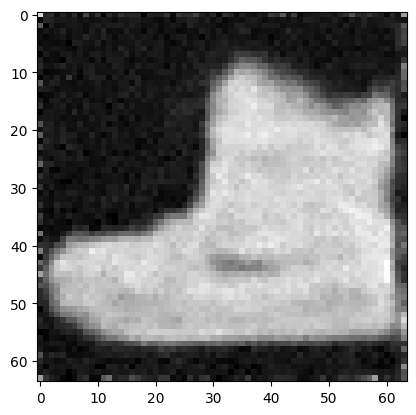

In [5]:
from rsl_depth_completion.conditional_diffusion.config import cfg

for ds_name in ["mnist"]:
    for ds_kwargs in ds_params:
        ds_kwargs["use_rgb_as_text_embed"] = not ds_kwargs["use_rgb_as_cond_image"]
        ds_kwargs["include_sdm_and_rgb_in_sample"] = True
        ds_kwargs["do_crop"] = True
        print(ds_kwargs)

        ds, train_dataloader, val_dataloader = load_data(
            ds_name=ds_name, do_debug=cfg.do_debug, **ds_kwargs
        )

        experiment = comet_ml.Experiment(
            api_key="W5npcWDiWeNPoB2OYkQvwQD0C",
            project_name="rsl_depth_completion",
            auto_metric_logging=True,
            auto_param_logging=True,
            auto_histogram_tensorboard_logging=True,
            log_env_details=False,
            log_env_host=False,
            disabled=cfg.disabled,
        )
        log_params_to_exp(experiment, ds_kwargs, "dataset")
        log_params_to_exp(experiment, cfg.params(), "base_config")

        print(
            "Number of train samples",
            len(train_dataloader) * train_dataloader.batch_size,
        )

        import gc


        gc.collect()
        torch.cuda.empty_cache()
        from model import init_model

        unets, imagen = init_model(cfg.timesteps, experiment, ds_kwargs)

        unets[0].to(cfg.device)
        imagen.to(cfg.device)

        print(
            "Number of parameters in model",
            sum(p.numel() for p in imagen.parameters() if p.requires_grad),
        )

        optimizer = optim.Adam(imagen.parameters(), lr=cfg.lr)

        input_name = "interp_sdm"

        if ds_kwargs["use_cond_image"]:
            if ds_kwargs["use_rgb_as_cond_image"]:
                img_cond = "rgb"
            else:
                img_cond = "sdm"
        else:
            img_cond = "none"

        if ds_kwargs["use_text_embed"]:
            if ds_kwargs["use_rgb_as_text_embed"]:
                text_cond = "rgb"
            else:
                text_cond = "sdm"
        else:
            text_cond = "none"

        cond = f"{img_cond=}_{text_cond=}"
        exp_dir = f"{input_name=}/{cond=}/{cfg.lr=}_{cfg.timesteps=}"

        exp_dir = (
            f"{max([int(x) for x in os.listdir(logdir)]) + 1:03d}" if os.path.isdir(logdir) else "001"
        )
        train_logdir = logdir / exp_dir / cond
        train_logdir.mkdir(parents=True, exist_ok=True)
        train_writer = tf.summary.create_file_writer(str(train_logdir))

        from train import train

        train(
            imagen,
            optimizer,
            train_dataloader,
            do_debug=cfg.do_debug,
            out_dir=train_logdir,
            train_writer=train_writer,
        )

        experiment.add_tags([k for k, v in ds_kwargs.items() if v])
        experiment.add_tag(ds_name)
        experiment.add_tag("overfit" if cfg.do_overfit else "full_data")
        experiment.add_tag("debug" if cfg.do_debug else "train")

        experiment.end()


In [6]:
x=next(iter(train_dataloader))

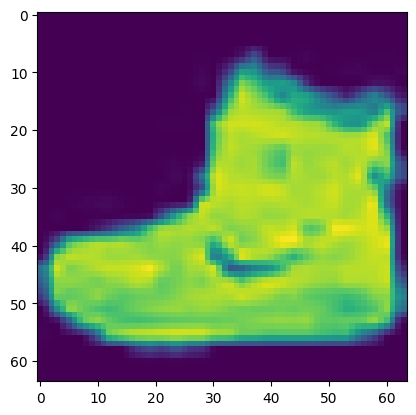

Epoch 799: 100%|██████████| 800/800 [05:40<00:00,  7.49it/s, diff_to_orig_img=0.0216, loss=0.00806]

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x["image"][0].permute(1,2,0).cpu().numpy())